In [1]:
import pandas as pd
import re #regular expression matching for removing unwanted columns by name
import natsort as ns #3rd party package for natural sorting


In [2]:
df0_raw = pd.read_csv("5G_count_all.tsv", sep = '\t')

In [3]:
df0_raw

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM69_t2_TR1,...,5GB1_FM21_TR1,5GB1_FM21_TR2,5GB1_FM21_TR2_UW,5GB1_FM03_TR1_QC,5GB1_FM03_TR2_QC,5GB1_FM20_TR1_QC,5GB1_FM20_TR2_QC,5GB1_FM20_TR3_QC,5GB1_FM21_TR1_QC,5GB1_FM21_TR2_QC
0,MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,34,...,779,612,658,28,122,19,176,55,80,71
1,MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,1,...,56,59,54,0,4,1,12,4,7,7
2,MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,2,...,15,94,24,0,4,0,2,2,1,3
3,MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,4,...,167,124,155,2,16,4,49,8,13,22
4,MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,71,...,1356,1201,1211,57,180,24,227,116,166,136
5,MBURv2_10003,Protein traN,CDS,NaN,MBURv2,875,1594,NaN,NaN,132,...,4493,2562,4006,119,449,69,846,360,421,432
6,MBURv2_10004,Protein TraM,CDS,traM,MBURv2,1631,2071,NaN,NaN,23,...,1315,842,1188,25,87,14,210,101,123,133
7,MBURv2_10005,Protein TraL,CDS,traL,MBURv2,2071,2796,NaN,NaN,36,...,1371,750,1240,29,113,15,270,90,111,139
8,MBURv2_10006,Protein TraK,CDS,traK,MBURv2,2796,3176,NaN,NaN,25,...,509,323,530,12,41,6,138,66,48,62
9,MBURv2_10007,Protein TraJ,CDS,traJ,MBURv2,3508,3876,NaN,NaN,11,...,670,423,655,17,44,9,149,58,61,64


# Removing columns

Need to remove the following columns manually 

[total, ribo0, br1_QC, br2_QC] - these dont exist in the dataframe 

[5GB1_ferm_WT_QC, 5GB1_ferm_Ack_QC, 5GB1C_latelog_vial_TR2_QC, 5GB1_FM58_Td20h_TR1_QC, 5GB1_FM58_Td32h_TR3_QC, 5GB1_LTrecycle_TR1_QC, 5GB1_LTrecycle_TR1,
5GB1_vial_wLa_TR3, 5GB1_vial_woLa_TR2]

Need to remove all QC runs except FM34 which we will keep

In [4]:
to_remove = ["5GB1_ferm_WT_QC", "5GB1_ferm_Ack_QC", "5GB1C_latelog_vial_TR2_QC", 
             "5GB1_FM58_Td20h_TR1_QC", "5GB1_FM58_Td32h_TR3_QC", "5GB1_LTrecycle_TR1_QC", "5GB1_LTrecycle_TR1",
             "5GB1_vial_wLa_TR3", "5GB1_vial_woLa_TR2"] 

In [5]:
#manually removing some unwanted columns 
df1_raw_filtered = df0_raw.drop(df0_raw.loc[:,to_remove].columns, axis = 1)

In [6]:
df1_raw_filtered

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM69_t2_TR1,...,5GB1_FM21_TR1,5GB1_FM21_TR2,5GB1_FM21_TR2_UW,5GB1_FM03_TR1_QC,5GB1_FM03_TR2_QC,5GB1_FM20_TR1_QC,5GB1_FM20_TR2_QC,5GB1_FM20_TR3_QC,5GB1_FM21_TR1_QC,5GB1_FM21_TR2_QC
0,MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,34,...,779,612,658,28,122,19,176,55,80,71
1,MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,1,...,56,59,54,0,4,1,12,4,7,7
2,MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,2,...,15,94,24,0,4,0,2,2,1,3
3,MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,4,...,167,124,155,2,16,4,49,8,13,22
4,MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,71,...,1356,1201,1211,57,180,24,227,116,166,136
5,MBURv2_10003,Protein traN,CDS,NaN,MBURv2,875,1594,NaN,NaN,132,...,4493,2562,4006,119,449,69,846,360,421,432
6,MBURv2_10004,Protein TraM,CDS,traM,MBURv2,1631,2071,NaN,NaN,23,...,1315,842,1188,25,87,14,210,101,123,133
7,MBURv2_10005,Protein TraL,CDS,traL,MBURv2,2071,2796,NaN,NaN,36,...,1371,750,1240,29,113,15,270,90,111,139
8,MBURv2_10006,Protein TraK,CDS,traK,MBURv2,2796,3176,NaN,NaN,25,...,509,323,530,12,41,6,138,66,48,62
9,MBURv2_10007,Protein TraJ,CDS,traJ,MBURv2,3508,3876,NaN,NaN,11,...,670,423,655,17,44,9,149,58,61,64


In [7]:
#Isolating FM34 - Cu transition 3+ hours 
df1a_FM34_only = df1_raw_filtered.select(lambda x: re.search("FM34", x), axis=1)


In [8]:
#Removing all QC runs 
df1_raw_filtered = df1_raw_filtered.select(lambda x: not re.search("QC", x), axis=1)

In [14]:
#naturally sorting the filtered columns
to_sort = df1_raw_filtered.loc[:,"5GB1_FM69_t2_TR1":]

cols = list(ns.natsorted(to_sort.columns))
cols_sorted = to_sort[cols]

#adding descriptive columns
qualitative = df1_raw_filtered.loc[:, "locus_tag":"translation"]
df1b_filtered_sorted = pd.concat([qualitative, cols_sorted], axis=1)

#isolating FM40 (to be added back later for particular order )
df1b_FM40_only = df1b_filtered_sorted.select(lambda x: re.search("FM40", x), axis=1)

#removing FM40 (to be added right back at the end)
df1b_filtered_sorted = df1b_filtered_sorted.select(lambda x: not re.search("FM40", x), axis=1)

#Adding FM40
cleaned_up = pd.concat([df1b_filtered_sorted, df1b_FM40_only], axis=1)

#adding FM34
df2_cleaned_up = pd.concat([cleaned_up, df1a_FM34_only], axis=1)

#setting locus tag as index
df2_cleaned_up = df2_cleaned_up.set_index("locus_tag")

In [15]:
df2_cleaned_up

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,1913,1700,...,294,852,322,118,111,100,90,56,117,124
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,177,161,...,18,40,16,5,3,4,4,1,10,3
MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,54,47,...,6,30,2,5,3,3,2,0,2,0
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,349,319,...,38,87,25,6,9,23,6,5,9,8
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,1833,1199,...,667,1497,707,290,277,196,173,132,192,241
MBURv2_10003,Protein traN,CDS,NaN,MBURv2,875,1594,NaN,NaN,8721,7714,...,1331,3626,1315,553,511,510,329,277,408,519
MBURv2_10004,Protein TraM,CDS,traM,MBURv2,1631,2071,NaN,NaN,1862,1675,...,220,516,185,72,61,91,75,29,68,74
MBURv2_10005,Protein TraL,CDS,traL,MBURv2,2071,2796,NaN,NaN,2036,1838,...,310,743,332,67,65,68,75,37,66,73
MBURv2_10006,Protein TraK,CDS,traK,MBURv2,2796,3176,NaN,NaN,1869,1171,...,276,621,304,160,69,90,57,45,120,84


# Running TPM function on all the data columns


In [20]:
cd executible/

/Users/alexeygilman/repos/Cu_transition_time_course-/executible


In [21]:
%run Cu_transition_functionalized.py

In [23]:
columns = df2_cleaned_up.loc[:,"5GB1_FM12_TR1":].columns

In [25]:
df3_TPM = TPM_counts(df2_cleaned_up,"start_coord","end_coord",columns)

In [26]:
df3_TPM

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,17.582218,17.547831,...,20.189929,23.793199,21.197329,21.782989,21.127986,18.032260,21.768993,23.933245,25.147654,24.738111
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,7.157884,7.312284,...,5.438920,4.915027,4.634447,4.061235,2.512517,3.173678,4.257048,1.880469,9.457238,2.633412
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,14.600242,14.987912,...,11.878101,11.058811,7.491024,5.041533,7.797467,18.877911,6.605763,9.726565,8.805014,7.264584
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,38.341323,28.166938,...,104.245961,95.143906,105.923083,121.837059,119.994358,80.436316,95.233090,128.390657,93.920152,109.422802
MBURv2_10003,Protein traN,CDS,NaN,MBURv2,875,1594,NaN,NaN,88.169356,87.588448,...,100.544474,111.386799,95.223404,112.293156,106.991360,101.160979,87.535540,130.222494,96.463823,113.895062
MBURv2_10004,Protein TraM,CDS,traM,MBURv2,1631,2071,NaN,NaN,30.734416,31.051023,...,27.132933,25.879122,21.871753,23.870118,20.852184,29.469865,32.579446,22.258615,26.248659,26.513262
MBURv2_10005,Protein TraL,CDS,traL,MBURv2,2071,2796,NaN,NaN,20.413855,20.697056,...,23.224037,22.635527,23.842506,13.492699,13.496994,13.376658,19.789994,17.250585,15.475480,15.887526
MBURv2_10006,Protein TraK,CDS,traK,MBURv2,2796,3176,NaN,NaN,35.708220,25.126478,...,39.400048,36.049981,41.600548,61.398203,27.301369,33.735945,28.659651,39.978479,53.615835,34.835684
MBURv2_10007,Protein TraJ,CDS,traJ,MBURv2,3508,3876,NaN,NaN,24.619096,19.186300,...,21.225053,18.401381,22.889647,17.829813,10.213485,12.385084,8.306434,11.007625,17.069160,9.420335


In [31]:
df3_TPM.describe()

,start_coord,end_coord,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2523912.507710,2524848.262585,NaN,226.699899,226.695346,226.697112,226.704348,226.594462,226.614222,226.653431,...,226.688681,226.691177,226.693393,226.703354,226.700279,226.705513,226.700812,226.707496,226.690055,226.701056
std,1471366.679738,1471365.070314,NaN,2608.104118,2618.586261,2226.261750,2589.462563,1246.618739,1229.043510,1759.623610,...,1219.717871,1122.334667,1333.858585,1243.151858,1371.191334,1304.612055,1417.656243,1345.465894,1377.544663,1278.153592
min,116.000000,289.000000,NaN,0.128012,0.130699,0.303466,0.201181,0.235129,0.955192,0.425168,...,0.296514,0.495039,0.375090,0.455466,0.237590,0.114161,0.298391,0.263617,0.493421,0.252605
25%,1228352.750000,1230090.250000,NaN,23.920135,24.641320,25.954707,22.500866,43.295853,42.741254,26.266172,...,25.257989,26.315396,23.273639,25.932829,23.236787,24.509591,24.886934,24.752124,26.245040,25.814103
50%,2563815.000000,2564586.500000,NaN,51.965185,53.158422,57.974121,50.919943,83.877066,82.371945,57.175220,...,56.834464,58.201296,54.005551,57.905411,53.720495,55.809776,58.072669,59.395058,60.596720,61.800981
75%,3796009.000000,3796603.500000,NaN,109.742344,112.290835,123.777013,110.262018,162.001032,162.020610,120.513737,...,123.293527,129.071912,116.656100,124.025563,119.158968,125.158461,128.858717,130.436563,131.790463,134.177414
max,5066062.000000,5067294.000000,NaN,102291.663448,105614.890872,95689.662164,109973.088035,58854.542337,64511.010158,70926.914449,...,45789.636731,34735.533389,55623.888672,34926.035642,57022.329800,52977.343258,61079.897898,57365.249426,58854.913465,52180.163782


# Log 2 transform the data

In [28]:
df4_log2 = log_2_transform(df3_TPM,'5GB1_FM12_TR1','5GB1_FM34_T8_TR1_QC')

In [32]:
df4_log2.describe() 

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,5.711915,5.741699,5.854974,5.685472,6.408118,6.397127,5.912669,5.895753,5.899650,6.172266,...,5.892627,5.939207,5.822109,5.891138,5.810324,5.867605,5.896775,5.893200,5.951252,5.960253
std,1.899290,1.892151,1.915438,1.948127,1.712715,1.718178,1.865792,1.855358,1.838577,1.877034,...,1.971689,1.973475,2.003664,1.960701,2.025366,2.019438,2.021813,2.034819,1.982845,1.999880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.580154,4.623007,4.697924,4.491909,5.436157,5.417557,4.715134,4.732986,4.729698,4.988780,...,4.658668,4.717835,4.540624,4.696708,4.538339,4.615274,4.637316,4.629480,4.713973,4.690087
50%,5.699473,5.732226,5.857337,5.670159,6.390204,6.364081,5.837318,5.837747,5.842178,6.140328,...,5.828694,5.862979,5.755035,5.855626,5.747401,5.802446,5.859787,5.892270,5.921168,5.949558
75%,6.777976,6.811096,6.951600,6.784790,7.339859,7.340033,6.913054,6.893761,6.888171,7.209547,...,6.945953,7.012031,6.866118,6.954494,6.896744,6.967612,7.009646,7.027205,7.042102,7.067998
max,16.642329,16.688454,16.546075,16.746791,15.844866,15.977258,16.114046,16.573410,16.635053,15.420885,...,15.482733,15.084125,15.763417,15.092015,15.799239,15.693088,15.898410,15.807889,15.844875,15.671214


# Taking log2 ratio (fm23 is the baseline)

In [35]:
df5_log2_ratio = df4_log2.subtract(df4_log2['5GB1_FM23_TR3'], axis = "index")
df5_log2_ratio = 

In [39]:
df5_log2_ratio = df5_log2_ratio.drop(['5GB1_FM23_TR3'], axis = 1)

In [40]:
df5_log2_ratio.columns

Index(['5GB1_FM12_TR1', '5GB1_FM12_TR2', '5GB1_FM14_TR1', '5GB1_FM14_TR2',
       '5GB1_FM18_TR2', '5GB1_FM18_TR3', '5GB1_FM19_TR1', '5GB1_FM19_TR1_UW',
       '5GB1_FM19_TR3', '5GB1_FM20_TR3', '5GB1_FM20_TR3_UW', '5GB1_FM21_TR1',
       '5GB1_FM21_TR2', '5GB1_FM21_TR2_UW', '5GB1_FM22_TR1', '5GB1_FM22_TR3',
       '5GB1_FM22_TR3_UW', '5GB1_FM69_t2_TR1', '5GB1_FM69_t3_TR1',
       '5GB1_FM69_t3_TR1_UW', '5GB1_FM69_t4_TR1', '5GB1_FM69_t4_TR1_UW',
       '5GB1_FM80_t2_TR1', '5GB1_FM80_t4_TR1', '5GB1_FM81_t1_TR3',
       '5GB1_FM81_t2_TR3', '5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3',
       '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1', '5GB1_FM40_T60m_TR1',
       '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake',
       '5GB1_FM40_T180m_TR1', '5GB1_FM34_T0_TR1_QC', '5GB1_FM34_T3_TR3_QC',
       '5GB1_FM34_T4_TR3_QC', '5GB1_FM34_T5_TR2_QC', '5GB1_FM34_T6_TR3_QC',
       '5GB1_FM34_T7_TR3_QC', '5GB1_FM34_T8_TR1_QC'],
      dtype='object')

# Clustering log2(ratio)

In [43]:
from sklearn.cluster import KMeans

X = df5_log2_ratio

kmeans = KMeans(n_clusters=60)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=60, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [52]:
labels_kmeans = kmeans.labels_

In [45]:
print(np.unique(labels)) # unique bins, zero is noise
print(np.bincount(labels[labels!=-1])) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]
[ 89 116 186  55  24  97  13  14 127 134 198   5   5 162  89   4 200  34
  82 108 116  29   9 195 139  28 153  30 166  55  47 116   8   5  96 116
  10   5  13  10   5  18  16 157  70  14 204  71 126  18  26  57 117  91
 116 183   5   9   2  17]


In [53]:
df6_clusters = df5_log2_ratio
df6_clusters["cluster"] = labels_kmeans

In [65]:
df7_clust_means=df6_clusters.groupby("cluster").mean()

In [76]:
df7a_10_rows = df7_clust_means.iloc[:10,:]

# Going to try to cluster with HDBSCAN just for giggles

In [47]:
import hdbscan
X = df5_log2_ratio
HDBSCAN = hdbscan.HDBSCAN(metric = "euclidean", min_cluster_size=5)
HDBSCAN.fit(X)
labels = HDBSCAN.labels_



print(np.unique(labels)) # unique bins, zero is noise
print(np.bincount(labels[labels!=-1])) 

[-1  0  1  2  3  4  5  6]
[   7    7    7   26    9    5 3727]


# Learning categorical plotting

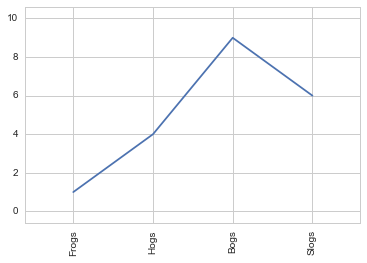

In [130]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 6]

x_ticks = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y,)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [234]:
y = df5_log2_ratio.loc["MBURv2_200002",:].values

array([-2.64366286, -2.82575567, -2.48284325, -2.64694531,  4.94004897,
        5.02482941,  1.25073173,  1.10559063,  1.2570876 , -0.95472228,
       -1.13721623, -0.76826503, -0.67201404, -0.80064231, -0.57604197,
       -0.25492805, -0.46434391,  8.02428896, -1.21414616, -1.48665936,
       -1.20603935, -1.43414969, -2.29288228, -2.56195627,  6.22922598,
        5.31179921,  7.84139547,  7.64458952,  7.83687815,  7.67870583,
        7.46541204,  7.28480844,  7.26711914,  6.90426907,  7.70924004,
        5.96920514,  3.8492341 ,  2.4032448 ,  1.63229539,  1.18578255,
        0.78512604])

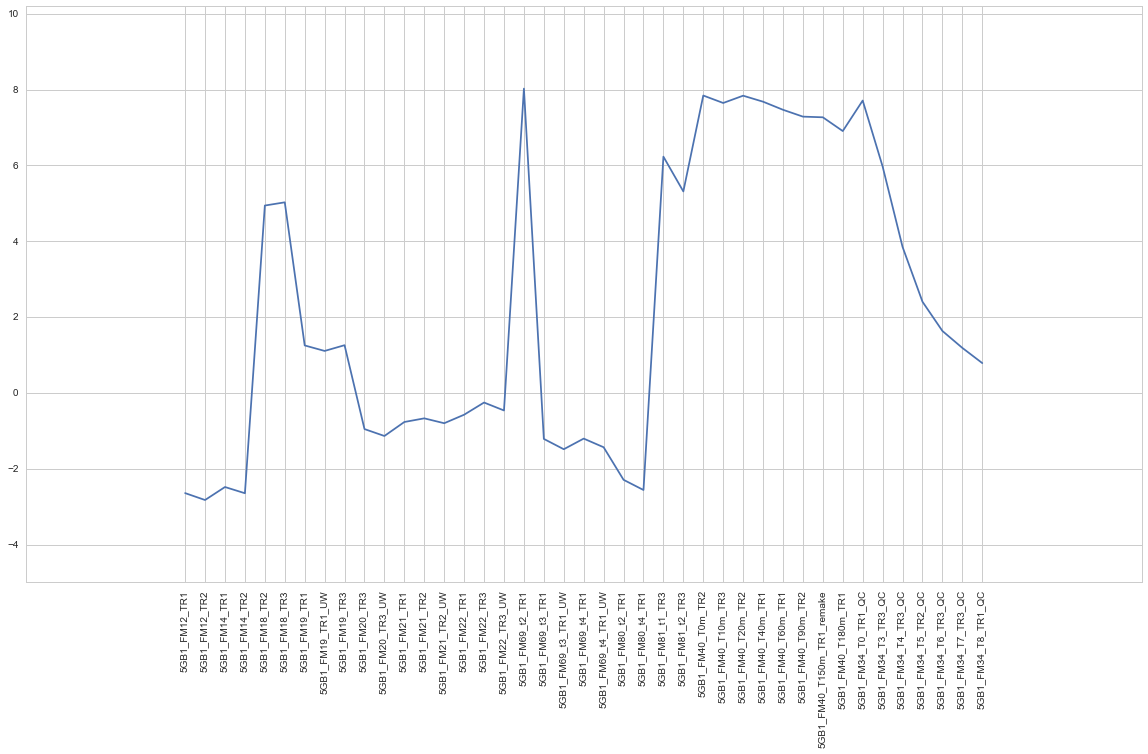

In [236]:
#df5_log2_ratio

x_axis = list(range(41))
y = df5_log2_ratio.loc["MBURv2_200002",:].values

x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()




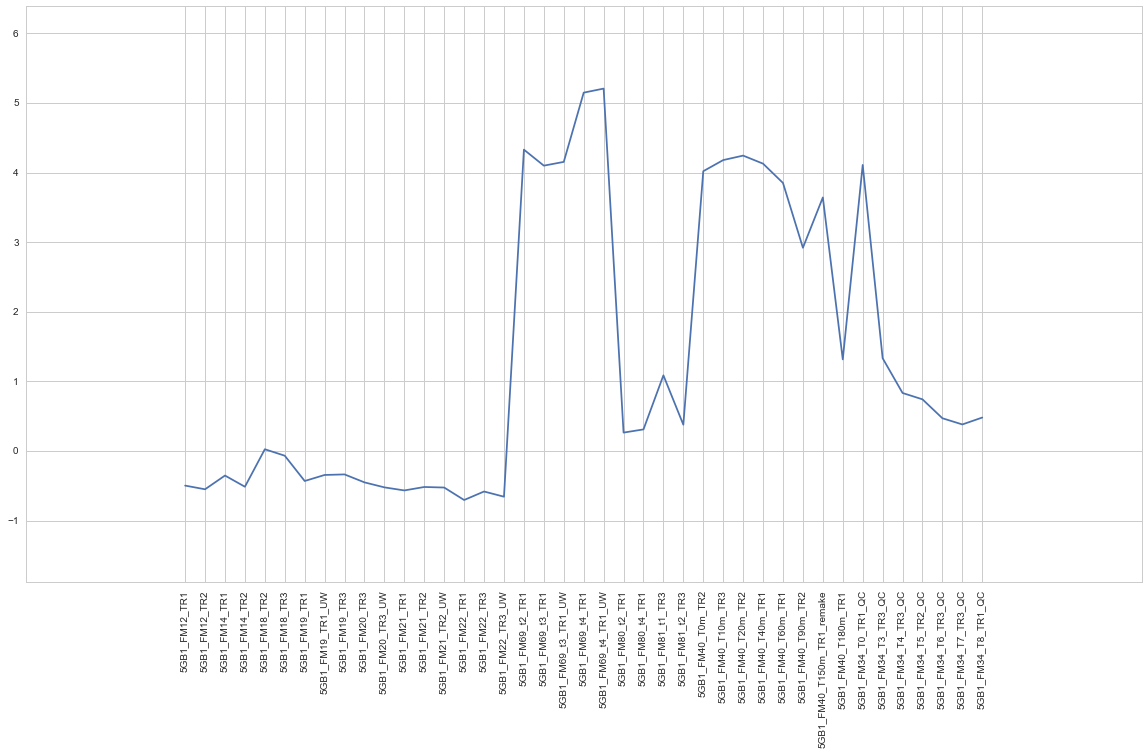

In [240]:
x_axis = list(range(41))
y = df7_clust_means.values[22]

x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()


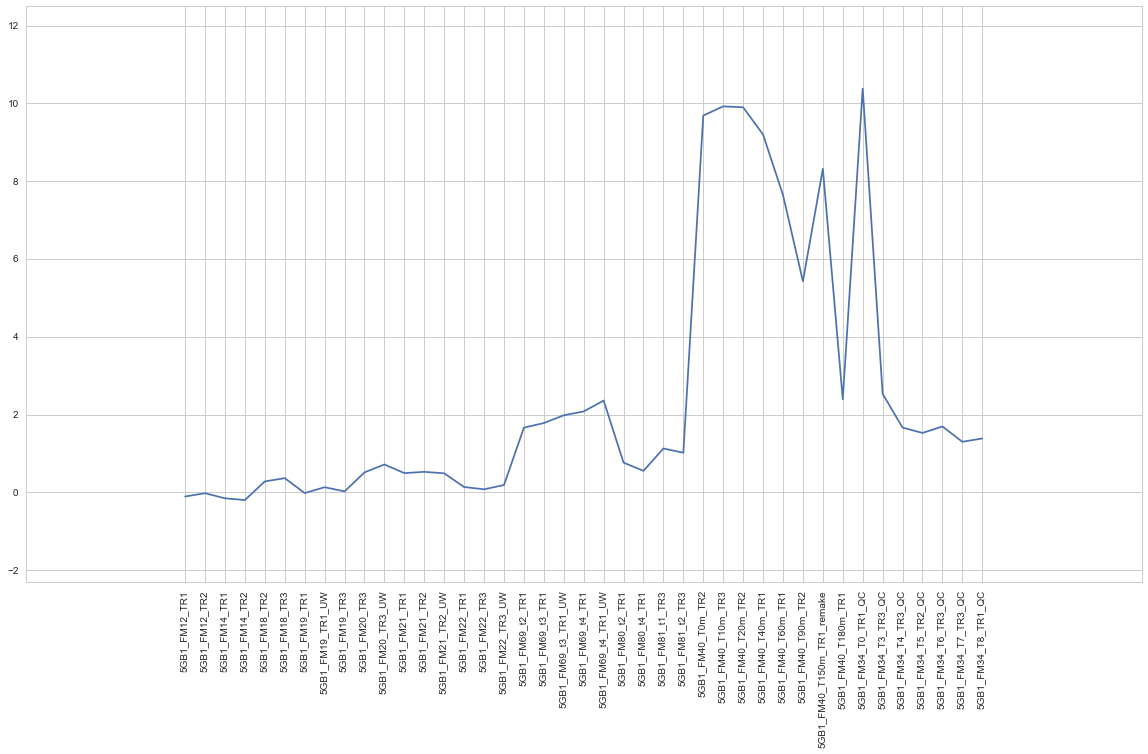

In [211]:
x_axis = list(range(41))
y = df7_clust_means.values[11]

x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()

### What is in cluster 11? 

In [238]:
df6_clusters.loc[df6_clusters.cluster == 11]

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC,cluster
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_130048,-0.170275,-0.026129,-0.222399,-0.426714,0.143003,0.159916,-0.436481,-0.205525,-0.343038,0.115260,...,7.784977,1.945075,9.780838,1.931199,1.263560,1.418609,1.480208,0.819079,0.841815,11
MBURv2_130049,0.351518,0.239509,0.443723,0.339483,0.255934,0.776646,0.364560,0.327411,0.149809,0.874237,...,9.017179,3.167415,11.043591,3.000076,2.325557,2.168631,2.217822,1.904292,2.162422,11
MBURv2_130050,0.163059,0.339334,-0.072028,-0.100873,0.458801,0.420688,-0.120867,0.068728,-0.074848,0.541936,...,8.555966,2.471979,10.225825,2.367582,1.655315,1.294551,1.308436,1.164831,1.383811,11
MBURv2_130051,0.233351,0.331408,0.047468,0.050427,0.009957,-0.016850,0.239211,0.272502,0.193782,0.978015,...,9.306669,3.058001,11.096959,3.146869,2.158077,2.068987,2.034475,1.488536,1.791104,11
MBURv2_130052,-1.106671,-0.990178,-0.960469,-0.843016,0.545441,0.488279,-0.134672,0.200922,0.201213,0.059407,...,6.920605,1.332058,9.753639,2.224930,0.924522,0.689257,1.432494,1.128948,0.748409,11


In [239]:
cluster11=df6_clusters.loc[df6_clusters.cluster == 11]
df3_TPM.loc[cluster11.index,:]

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_130048,Methane monooxygenase component A gamma chain,CDS,mmoZ,MBURv2,2193167,2193670,NaN,NaN,21.606525,23.876847,...,703.930027,5362.338302,93.619968,21387.915453,92.723851,58.373002,64.995994,67.831211,42.895327,43.576696
MBURv2_130049,Methane monooxygenase regulatory protein B,CDS,mmoB,MBURv2,2193680,2194105,NaN,NaN,14.165399,13.107226,...,743.191354,5752.450643,99.746681,23434.929209,88.822793,55.651110,49.915382,51.646690,41.558565,49.701012
MBURv2_130050,Methane monooxygenase component A beta chain,CDS,mmoY,MBURv2,2194116,2195294,NaN,NaN,18.170226,20.531671,...,640.353220,6107.690148,90.035631,19433.661877,83.750575,51.118016,39.808269,40.193235,36.385097,42.349015
MBURv2_130051,Methane monooxygenase component A alpha chain,CDS,mmoX,MBURv2,2195408,2196985,NaN,NaN,16.495838,17.655998,...,1206.833556,8886.181868,116.863397,30735.922781,124.288401,62.628850,58.878367,57.486588,39.375190,48.562918
MBURv2_130052,protein of unknown function,CDS,NaN,MBURv2,2197026,2197220,Evidence 5 : No homology to any previously rep...,NaN,5.375412,5.827468,...,259.673552,1402.370617,29.143542,9992.888101,54.115756,21.971615,18.665516,31.244719,25.316297,19.446734


In [ ]:
list(range(len(df7a_10_rows.columns)))

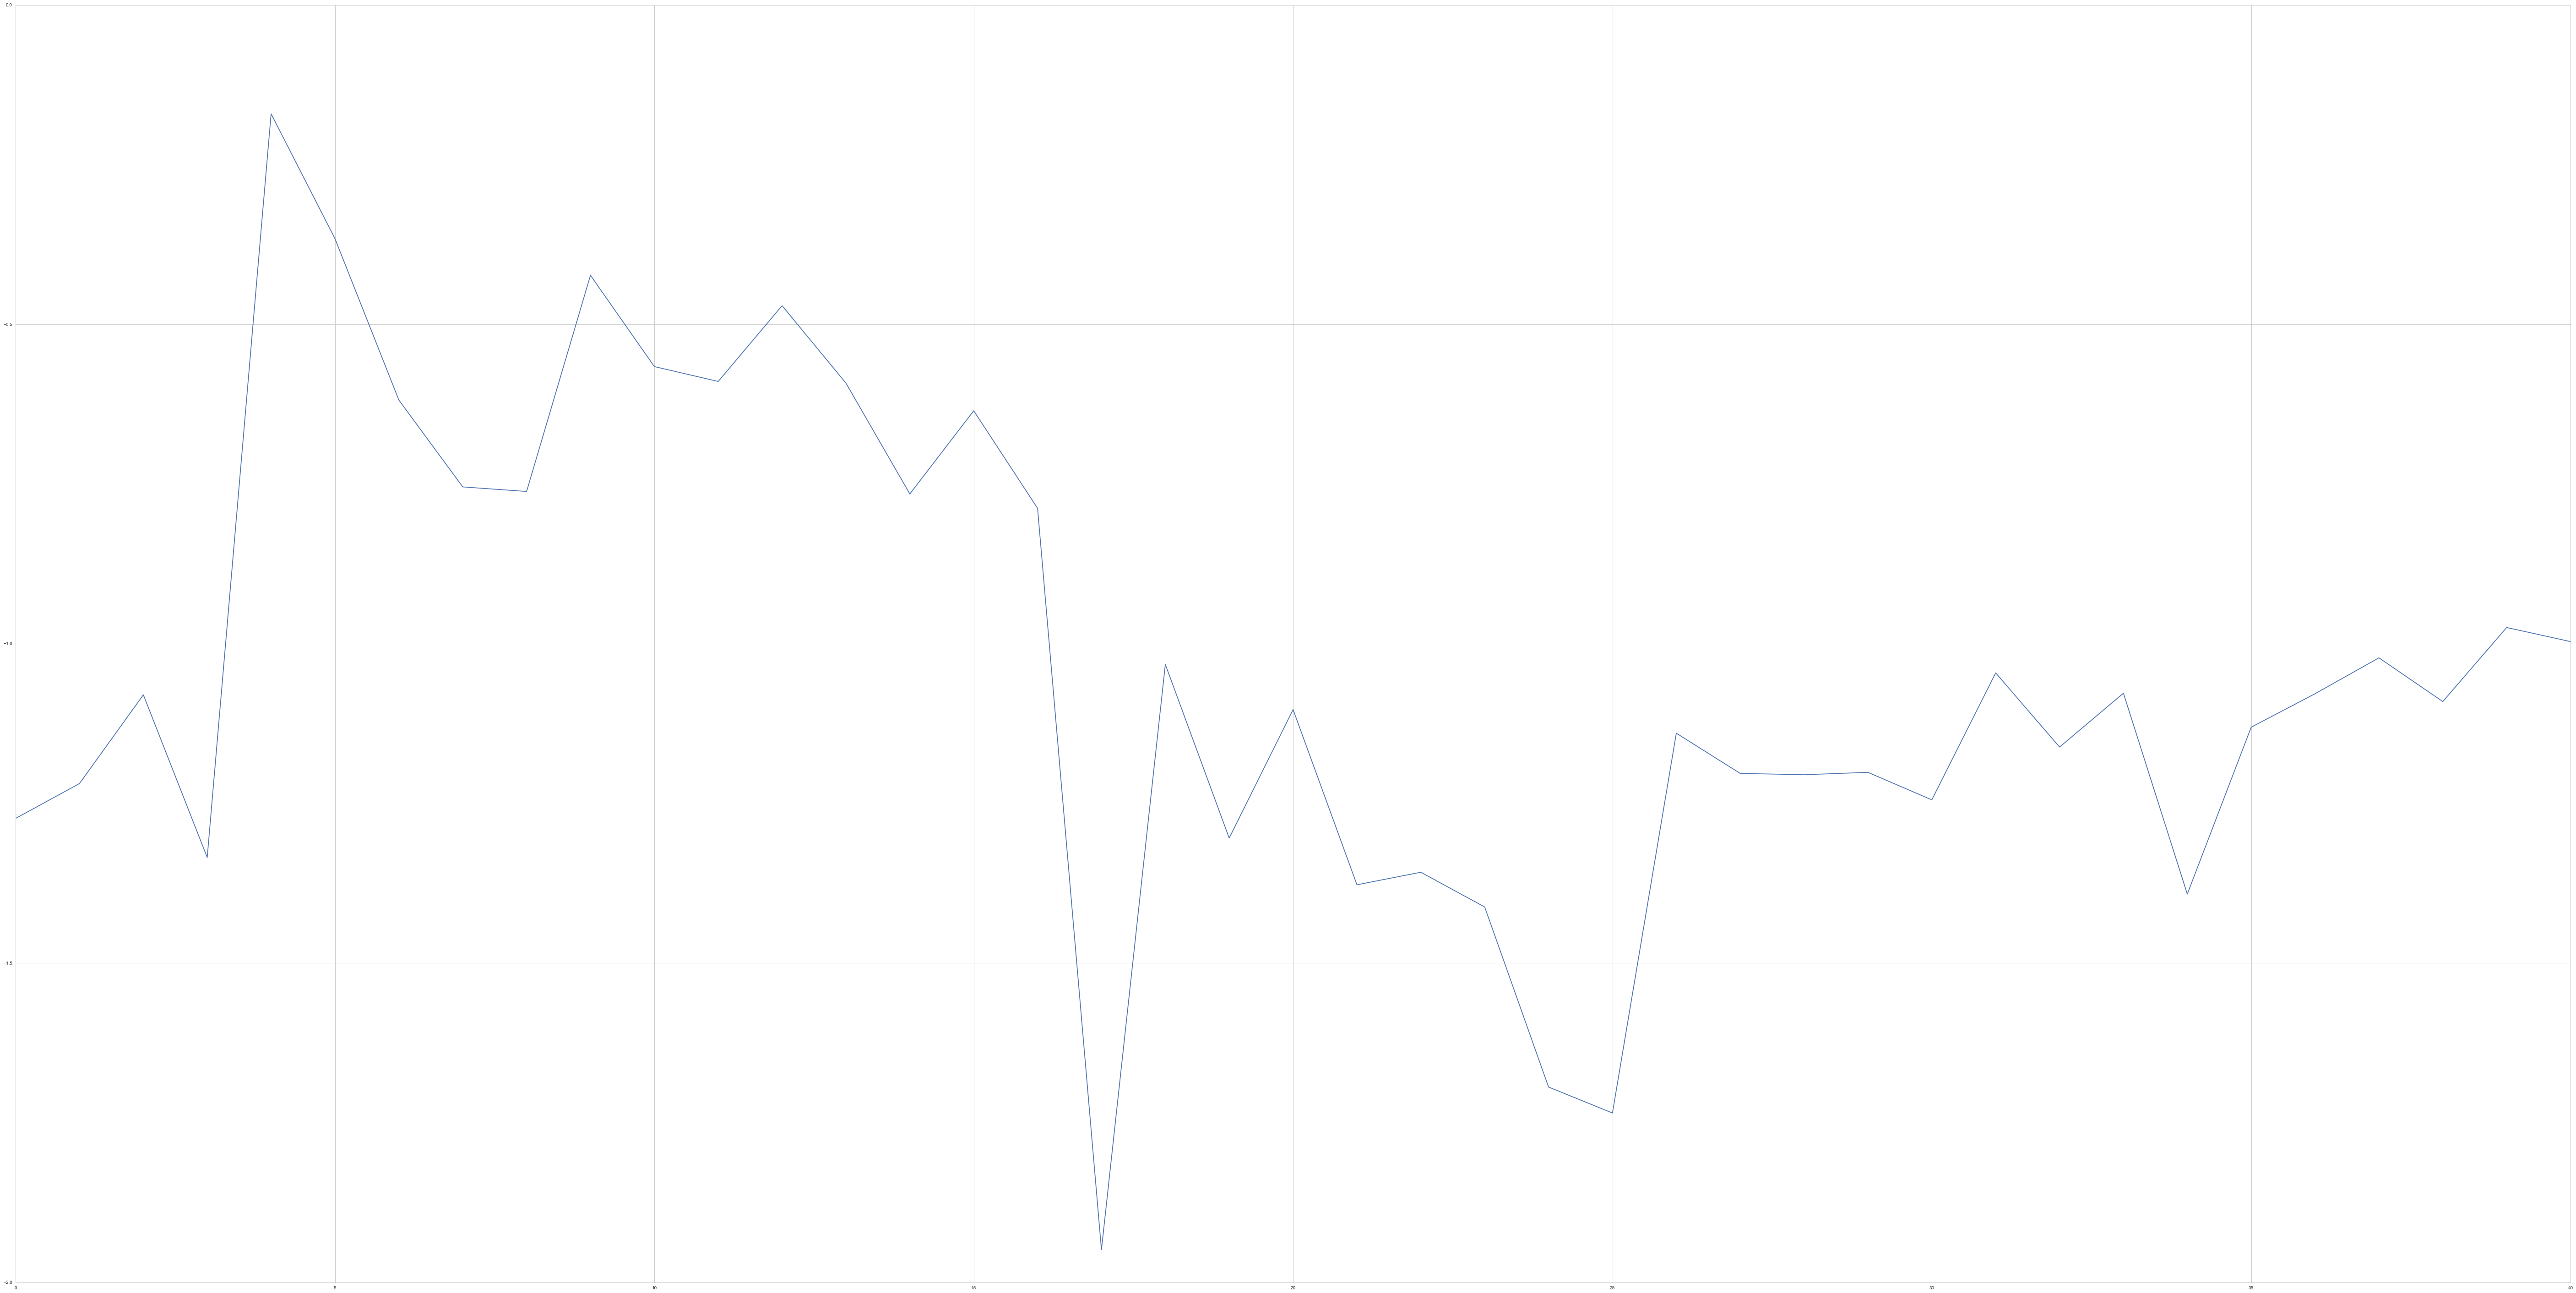

In [285]:
x_axis = list(range(len(df7a_10_rows.columns)))
x_ticks = df7a_10_rows.columns

fig = plt.figure(figsize = (100, 50))
    
y = df7a_10_rows.values[0]
#ax = fig.add_subplot(2, 2, 1)
plt.plot(x_axis,y)
plt.show()

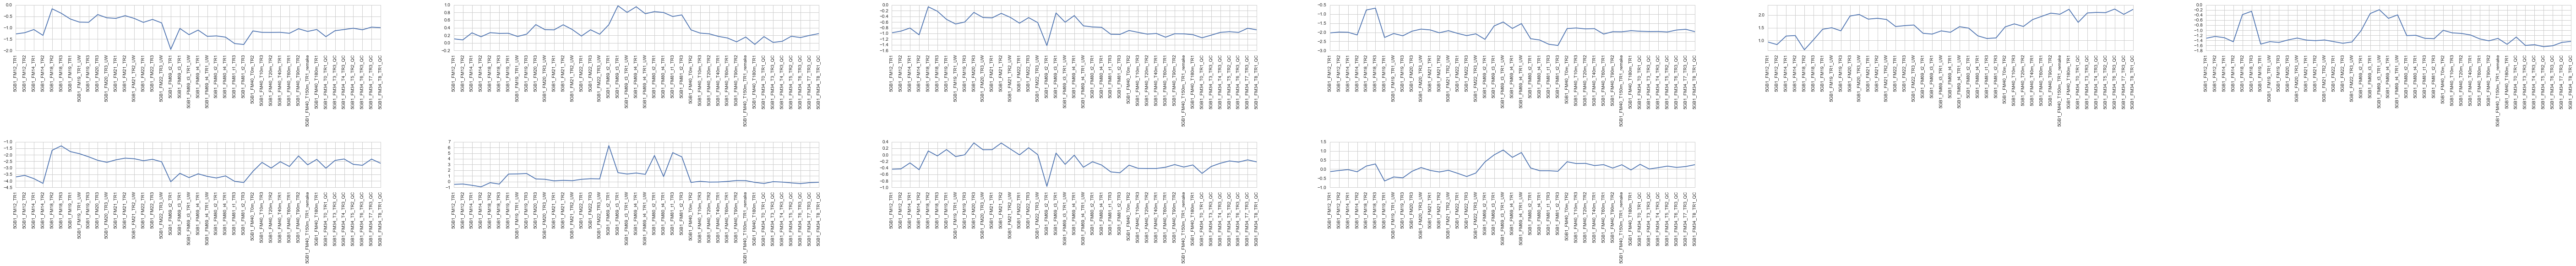

In [295]:
def draw_scatter(df, n_rows, n_cols):
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)))
    x_ticks = df.columns
    
    for i in range(df.shape[0]):
        y = df.values[i]
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.plot(x_axis,y)
        
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("clusters_scatter.pdf")
    
    
testa = df7a_10_rows
draw_scatter(testa, 10, 6 )

In [ ]:
def draw_scatter(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, histtype = "stepfilled", alpha = 0.3, normed = True, bins = 1000) 
        ax.set_title(var_name)
    plt.show()

testa = df2_TPM_log2_diff
draw_histograms(testa, testa.columns, 2, 4)

In [177]:
len(df7a_10_rows)

10

In [178]:
df7a_10_rows[0:10]

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
cluster,,,,,,,,,,,,,,,,,,,,,
0,-1.273582,-1.219004,-1.080088,-1.334726,-0.170425,-0.365922,-0.618505,-0.754577,-0.761704,-0.423287,...,-1.045783,-1.161892,-1.077594,-1.392060,-1.130806,-1.078397,-1.022184,-1.090621,-0.974711,-0.996731
1,0.107542,0.079717,0.265418,0.162627,0.270140,0.251220,0.253864,0.169075,0.231672,0.481690,...,0.028621,0.155273,-0.038317,0.166611,0.014407,0.042605,0.176000,0.141150,0.198301,0.244365
2,-0.977479,-0.920008,-0.810975,-1.049482,-0.065923,-0.221162,-0.507027,-0.670400,-0.600030,-0.262211,...,-1.011275,-1.015358,-1.043400,-1.152406,-1.061424,-0.963863,-0.938539,-0.964723,-0.818582,-0.875987
3,-2.034639,-1.989923,-1.999346,-2.146016,-0.779141,-0.677272,-2.284255,-2.067589,-2.193091,-1.940861,...,-1.969174,-1.974291,-1.910911,-1.943032,-1.959252,-1.955366,-1.982516,-1.875378,-1.836526,-1.962859
4,0.937396,0.834678,1.172148,1.191815,0.629841,1.024327,1.439474,1.499543,1.377426,1.961081,...,2.075777,2.032498,2.227281,1.712488,2.080874,2.104212,2.094579,2.236588,2.028257,2.220775
5,-1.318390,-1.242856,-1.292166,-1.453863,-0.382737,-0.251107,-1.546509,-1.448417,-1.479822,-1.382216,...,-1.416941,-1.321926,-1.554381,-1.267695,-1.598641,-1.569772,-1.647541,-1.611817,-1.478368,-1.439545
6,-3.701439,-3.577922,-3.825985,-4.190752,-1.652527,-1.315125,-1.753539,-1.916926,-2.152364,-2.423484,...,-2.086167,-2.769646,-2.349369,-3.028064,-2.430314,-2.322065,-2.731695,-2.805666,-2.328517,-2.653730
7,-0.473811,-0.407150,-0.634898,-0.902727,-0.171289,-0.418684,1.333555,1.366133,1.434447,0.485202,...,0.197176,0.178678,-0.115408,-0.312287,0.002659,-0.066107,-0.210415,-0.332782,-0.165013,-0.101020
8,-0.442687,-0.433165,-0.248224,-0.457482,0.118010,-0.034016,0.160271,-0.053877,0.001117,0.365505,...,-0.300147,-0.374731,-0.311647,-0.570204,-0.358514,-0.258922,-0.188470,-0.222847,-0.155333,-0.217902


In [163]:
df7a_10_rows.iloc[:,0]

cluster
0   -1.273582
1    0.107542
2   -0.977479
3   -2.034639
4    0.937396
5   -1.318390
6   -3.701439
7   -0.473811
8   -0.442687
9   -0.137255
Name: 5GB1_FM12_TR1, dtype: float64

In [164]:
df7a_10_rows

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
cluster,,,,,,,,,,,,,,,,,,,,,
0,-1.273582,-1.219004,-1.080088,-1.334726,-0.170425,-0.365922,-0.618505,-0.754577,-0.761704,-0.423287,...,-1.045783,-1.161892,-1.077594,-1.392060,-1.130806,-1.078397,-1.022184,-1.090621,-0.974711,-0.996731
1,0.107542,0.079717,0.265418,0.162627,0.270140,0.251220,0.253864,0.169075,0.231672,0.481690,...,0.028621,0.155273,-0.038317,0.166611,0.014407,0.042605,0.176000,0.141150,0.198301,0.244365
2,-0.977479,-0.920008,-0.810975,-1.049482,-0.065923,-0.221162,-0.507027,-0.670400,-0.600030,-0.262211,...,-1.011275,-1.015358,-1.043400,-1.152406,-1.061424,-0.963863,-0.938539,-0.964723,-0.818582,-0.875987
3,-2.034639,-1.989923,-1.999346,-2.146016,-0.779141,-0.677272,-2.284255,-2.067589,-2.193091,-1.940861,...,-1.969174,-1.974291,-1.910911,-1.943032,-1.959252,-1.955366,-1.982516,-1.875378,-1.836526,-1.962859
4,0.937396,0.834678,1.172148,1.191815,0.629841,1.024327,1.439474,1.499543,1.377426,1.961081,...,2.075777,2.032498,2.227281,1.712488,2.080874,2.104212,2.094579,2.236588,2.028257,2.220775
5,-1.318390,-1.242856,-1.292166,-1.453863,-0.382737,-0.251107,-1.546509,-1.448417,-1.479822,-1.382216,...,-1.416941,-1.321926,-1.554381,-1.267695,-1.598641,-1.569772,-1.647541,-1.611817,-1.478368,-1.439545
6,-3.701439,-3.577922,-3.825985,-4.190752,-1.652527,-1.315125,-1.753539,-1.916926,-2.152364,-2.423484,...,-2.086167,-2.769646,-2.349369,-3.028064,-2.430314,-2.322065,-2.731695,-2.805666,-2.328517,-2.653730
7,-0.473811,-0.407150,-0.634898,-0.902727,-0.171289,-0.418684,1.333555,1.366133,1.434447,0.485202,...,0.197176,0.178678,-0.115408,-0.312287,0.002659,-0.066107,-0.210415,-0.332782,-0.165013,-0.101020
8,-0.442687,-0.433165,-0.248224,-0.457482,0.118010,-0.034016,0.160271,-0.053877,0.001117,0.365505,...,-0.300147,-0.374731,-0.311647,-0.570204,-0.358514,-0.258922,-0.188470,-0.222847,-0.155333,-0.217902


In [162]:
df7_clust_means.shape[0]

60

In [147]:
x_axis = list(df7_clust_means.columns)

In [157]:
len(df7_clust_means.columns)

41

In [155]:
x_axis

AttributeError: 'list' object has no attribute 'shape'

In [119]:
y = np.random.randint(0,100,41)

In [124]:
print(len(y))
print(len(x_axis))
print(len(x_ticks))

41
41
41


In [129]:
plt.plot?

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [57]:
titanic = sns.load_dataset("titanic")

In [58]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


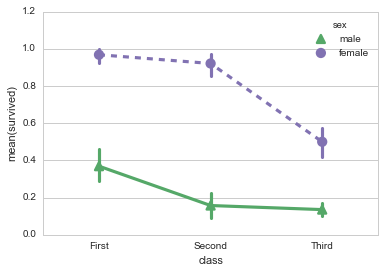

In [68]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

In [69]:
df7_clust_means.columns

Index(['5GB1_FM12_TR1', '5GB1_FM12_TR2', '5GB1_FM14_TR1', '5GB1_FM14_TR2',
       '5GB1_FM18_TR2', '5GB1_FM18_TR3', '5GB1_FM19_TR1', '5GB1_FM19_TR1_UW',
       '5GB1_FM19_TR3', '5GB1_FM20_TR3', '5GB1_FM20_TR3_UW', '5GB1_FM21_TR1',
       '5GB1_FM21_TR2', '5GB1_FM21_TR2_UW', '5GB1_FM22_TR1', '5GB1_FM22_TR3',
       '5GB1_FM22_TR3_UW', '5GB1_FM69_t2_TR1', '5GB1_FM69_t3_TR1',
       '5GB1_FM69_t3_TR1_UW', '5GB1_FM69_t4_TR1', '5GB1_FM69_t4_TR1_UW',
       '5GB1_FM80_t2_TR1', '5GB1_FM80_t4_TR1', '5GB1_FM81_t1_TR3',
       '5GB1_FM81_t2_TR3', '5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3',
       '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1', '5GB1_FM40_T60m_TR1',
       '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake',
       '5GB1_FM40_T180m_TR1', '5GB1_FM34_T0_TR1_QC', '5GB1_FM34_T3_TR3_QC',
       '5GB1_FM34_T4_TR3_QC', '5GB1_FM34_T5_TR2_QC', '5GB1_FM34_T6_TR3_QC',
       '5GB1_FM34_T7_TR3_QC', '5GB1_FM34_T8_TR1_QC'],
      dtype='object')

In [60]:
sns.pointplot?

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


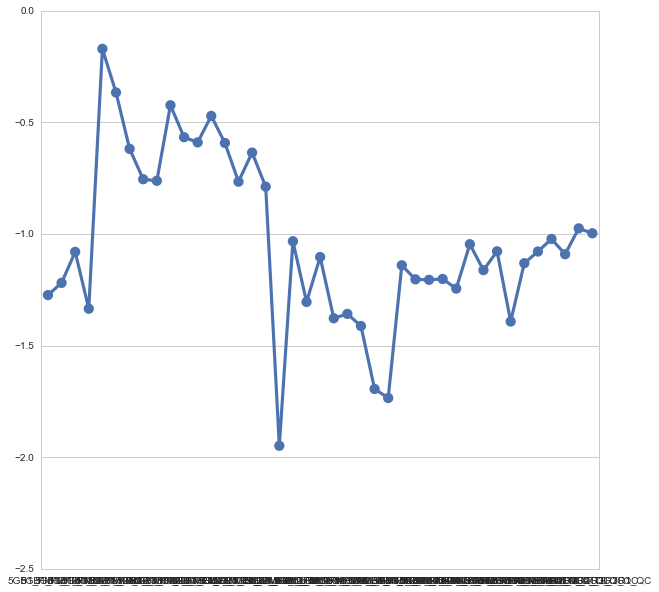

In [108]:
a0_dims = (10,10)
fig, ax = plt.subplots(figsize=a0_dims)


sns_plot = sns.pointplot(data=df7a_10_rows.iloc[0:1,:])
fig = sns_plot.get_figure()
fig.savefig("output.png")

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


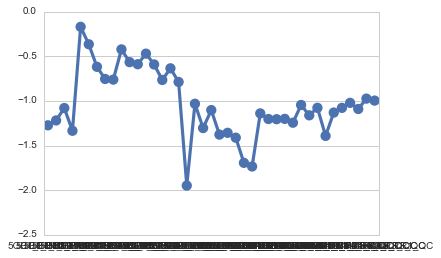

In [106]:
sns_plot = sns.pointplot(data=df7a_10_rows.iloc[0:1,:], size=4)
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [104]:
sns.pointplot?

In [72]:
df7_clust_means.iloc[0,:]

5GB1_FM12_TR1                -1.273582
5GB1_FM12_TR2                -1.219004
5GB1_FM14_TR1                -1.080088
5GB1_FM14_TR2                -1.334726
5GB1_FM18_TR2                -0.170425
5GB1_FM18_TR3                -0.365922
5GB1_FM19_TR1                -0.618505
5GB1_FM19_TR1_UW             -0.754577
5GB1_FM19_TR3                -0.761704
5GB1_FM20_TR3                -0.423287
5GB1_FM20_TR3_UW             -0.566172
5GB1_FM21_TR1                -0.589488
5GB1_FM21_TR2                -0.470858
5GB1_FM21_TR2_UW             -0.592093
5GB1_FM22_TR1                -0.765568
5GB1_FM22_TR3                -0.635341
5GB1_FM22_TR3_UW             -0.788074
5GB1_FM69_t2_TR1             -1.948794
5GB1_FM69_t3_TR1             -1.032497
5GB1_FM69_t3_TR1_UW          -1.304396
5GB1_FM69_t4_TR1             -1.103178
5GB1_FM69_t4_TR1_UW          -1.377519
5GB1_FM80_t2_TR1             -1.357881
5GB1_FM80_t4_TR1             -1.412272
5GB1_FM81_t1_TR3             -1.694170
5GB1_FM81_t2_TR3         

In [62]:
%matplotlib inline